# Correlation between structure and process parameters


## Data available @ https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/KJMK9Z



In [1]:
from IPython.display import Image
Image(url='MovieImages.gif', width=400)



|      |      |
|------|------|
| <img src="structure.png" alt="figure" style="width: 400px;"/>| <img src="parameters.png" alt="drawing" style="width: 400px;"/> 

***

### Total of 1772 data points (structures) that correspond to the combination of 7 process parameters
### Each structure consists of 300x300x200 voxels with distinct numbers (grains)

## Goal: build a model that correlates structure to its parameters


In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import scipy.io
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats as stat
from sklearn import datasets, linear_model
import pandas as pd
import seaborn as sns

### Statistical representation of Data 

In [3]:
# files saved as mat files
# load chord-length distribution (CLD) in 3 directions for the entire data

mat = scipy.io.loadmat('ChLOrig.mat')
GG = mat['GG']
GG.shape


(1772, 900)

In [4]:
Cld_1 = GG[1,:]
Cld_1.shape

(900,)

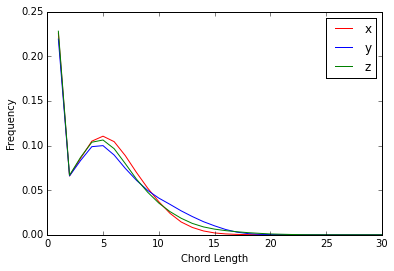

In [5]:
#plot example CLD

plt.plot(range(1,301), Cld_1[:300], 'r',range(1,301), Cld_1[300:600], 'b',range(1,301), Cld_1[600:], 'g' )
plt.ylabel('Frequency')
plt.xlabel('Chord Length')

plt.xlim(0,30)
plt.legend('xyz')

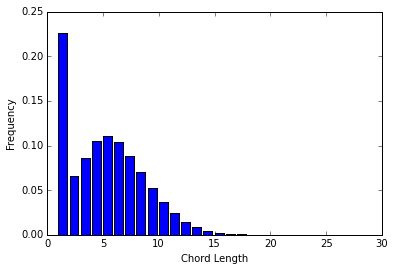

In [6]:
# these are nothing but histograms 

plt.bar(range(1,301), Cld_1[:300])

plt.xlim(0,30)
plt.ylabel('Frequency')
plt.xlabel('Chord Length')


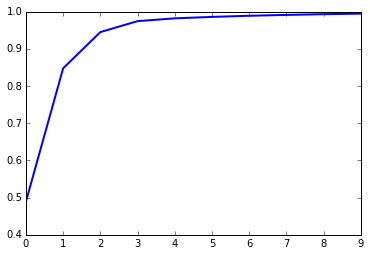

In [7]:
# perform dimensionality reduction using PCA

pca = PCA(n_components=10)
PCA_GG = pca.fit_transform(GG)
plt.plot(pca.explained_variance_ratio_.cumsum(), linewidth=2)


In [8]:
PCA_GG.shape

(1772, 10)

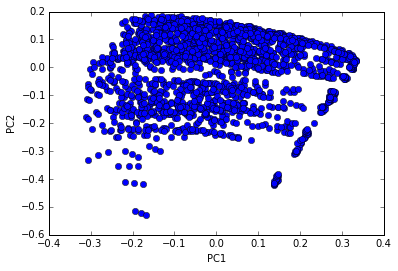

In [9]:
plt.plot(PCA_GG[:,0],PCA_GG[:,1],'o')

plt.xlabel('PC1')
plt.ylabel('PC2')

/Users/evdokiapopova/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


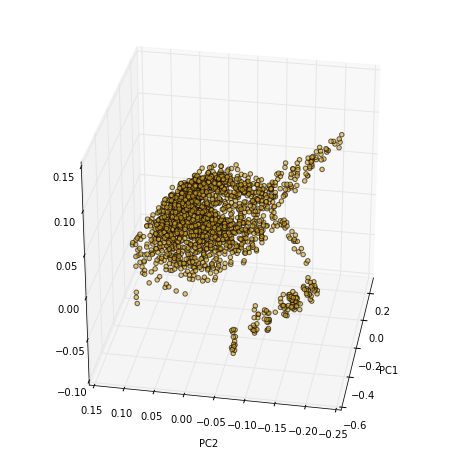

In [10]:

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(PCA_GG[:,1],PCA_GG[:,2],PCA_GG[:,3], marker='o', s=20, c="goldenrod", alpha=0.6)

plt.xlabel('PC1')
plt.ylabel('PC2')

ax.view_init(30, 190)



<img src="outlier.png" alt="outlier" style="width: 400px;"/>



In [11]:
# load train-test split dataset

mat = scipy.io.loadmat('ChLOrig_HC_xd75_x3_V7p5W70.mat')
CLD_Split = mat['GGs']
CLD_Split.shape

(1, 2)

In [12]:
testSet = CLD_Split[0,0]
trainSet = CLD_Split[0,1]

print(testSet.shape) ; print(trainSet.shape)

(684, 900)
(915, 900)


(0, 100)

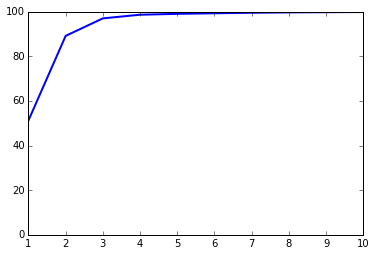

In [13]:
pca = PCA(n_components=10)
PCA_train = pca.fit_transform(trainSet)

plt.plot(range(1,11),pca.explained_variance_ratio_.cumsum() * 100, linewidth=2)
plt.ylim(0,100)


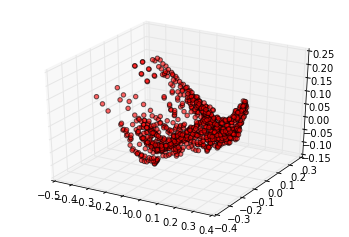

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(PCA_train[:,0],PCA_train[:,1],PCA_train[:,2], marker='o', s=20, c="r", alpha=0.6)


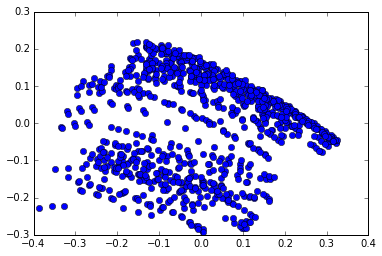

In [15]:
plt.plot(PCA_train[:,0],PCA_train[:,1],'o')

## Output: PC scores (PC1, PC2, PC3)

## Input: Process parameters

In [16]:
#mat = scipy.io.loadmat('PC_ChLOrig_HC_xd75_x3_V7p5W70.mat')
#PC_train = mat['PC']


In [17]:
# load parameters

mat = scipy.io.loadmat('metadata_ChLOrig_HC_xd75_x3_V7p5W70.mat')
param = mat['prms']

paramTest = param[0,0]
paramTrain = param[0,1]

print(paramTest.shape) ; print(paramTrain.shape)

(684, 8)
(915, 8)


In [18]:
parList = mat['parlist']
parList

array([[array([u'T'], 
      dtype='<U1'),
        array([u'X'], 
      dtype='<U1'),
        array([u'V'], 
      dtype='<U1'),
        array([u'W'], 
      dtype='<U1'),
        array([u'D'], 
      dtype='<U1'),
        array([u'L'], 
      dtype='<U1'),
        array([u'HAZ'], 
      dtype='<U3'),
        array([u'dump.additive4'], 
      dtype='<U14')]], dtype=object)

In [19]:
parName = ['T', 'X', 'V', 'W', 'D', 'L', 'HAZ']

In [20]:
df = pd.DataFrame({'PC1':PCA_train[:,0],'PC2':PCA_train[:,1],'PC3':PCA_train[:,2], 'T':paramTrain[:,0], 'X':paramTrain[:,1], 'V':paramTrain[:,2], 'W':paramTrain[:,3], 'D':paramTrain[:,4], 'L':paramTrain[:,5], 'HAZ':paramTrain[:,6]})
df.head()


,D,HAZ,L,PC1,PC2,PC3,T,V,W,X
0,100,20,50,-0.173591,-0.106618,-0.037223,20,10,60,1
1,100,35,50,-0.175319,-0.136852,-0.048563,20,10,60,1
2,100,5,50,-0.189604,-0.186935,-0.076888,20,10,60,1
3,100,20,60,-0.129740,-0.123487,-0.040791,20,10,60,1
4,100,35,60,-0.129425,-0.155703,-0.058097,20,10,60,1


In [21]:
df = df[['PC1', 'PC2', 'PC3', 'T', 'X', 'V', 'W', 'D', 'L', 'HAZ']]

df.head()

,PC1,PC2,PC3,T,X,V,W,D,L,HAZ
0,-0.173591,-0.106618,-0.037223,20,1,10,60,100,50,20
1,-0.175319,-0.136852,-0.048563,20,1,10,60,100,50,35
2,-0.189604,-0.186935,-0.076888,20,1,10,60,100,50,5
3,-0.129740,-0.123487,-0.040791,20,1,10,60,100,60,20
4,-0.129425,-0.155703,-0.058097,20,1,10,60,100,60,35


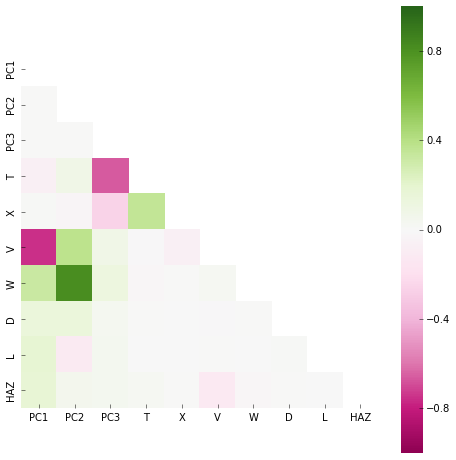

In [22]:
corr = np.corrcoef(df, rowvar=False)
corr.shape

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(8, 8))
ax = sns.heatmap(corr, mask = mask, square=True, vmin = -1, vmax = 1,  xticklabels = df.columns, yticklabels = df.columns, cmap = 'PiYG')


In [23]:
# calculate Pearson coefficient for each parameter

pearsonCoeff = []
for i in range(1,7):
    pearsonCoeff.append(stat.pearsonr(paramTrain[:,i],PCA_train[:,0]))


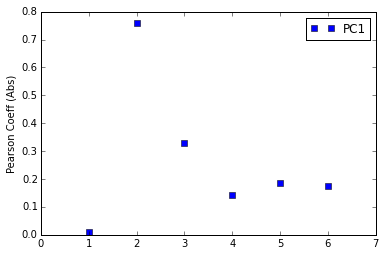

In [24]:
pearsonCoeff = np.array(pearsonCoeff)
plt.plot(np.linspace(1,6,6),abs(pearsonCoeff[:,0]),'s', label = 'PC1')

plt.xlim(0,7)
plt.ylabel('Pearson Coeff (Abs)')
plt.legend(loc='upper right')

In [25]:
paramTrain.shape; PCA_train.shape
#corr = np.corrcoef(paramTrain, PCA_train)

(915, 10)

In [26]:
#tmp = paramTrain[:,2]

#colorParV = [None] * 915
#colorParV[tmp == 2.5] = 'r'

#print(colorParV.shape)

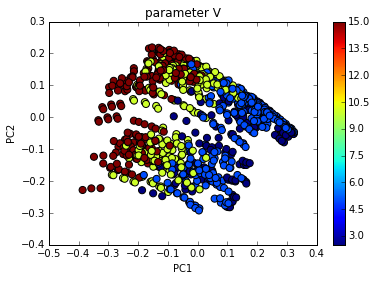

In [27]:
plt.scatter(PCA_train[:,0],PCA_train[:,1], marker = 'o', s = 50, c = paramTrain[:,2] )
plt.colorbar()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('parameter V')

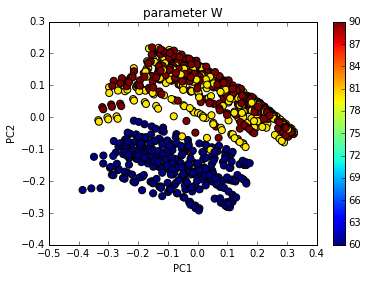

In [28]:
plt.scatter(PCA_train[:,0],PCA_train[:,1], marker = 'o', s = 50, c = paramTrain[:,3] )
plt.colorbar()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('parameter W')

In [29]:
paramTrain[:,1:7].shape

(915, 6)

## Building a model for PC1(parameters)

In [30]:
# ordinary least square linear regression 

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets (only PC1)
regr.fit(paramTrain[:,1:7], PCA_train[:,0])


/Users/evdokiapopova/anaconda/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
# regression coefficient

regr.coef_

array([-0.01188334, -0.02535218,  0.00428716,  0.00161142,  0.00346064,
        0.00119463])

In [32]:
# load test data (PCs projected to original PCA space)

mat = scipy.io.loadmat('PCtest.mat')
PC_test = mat['PCtest']

print(PC_test[:20,0])

[-0.10725741 -0.09862103 -0.12105726 -0.06001218 -0.04537237 -0.08562922
 -0.0161173   0.0029884  -0.05453498 -0.05809635 -0.07035515 -0.05422881
 -0.00725489 -0.0131779  -0.01975592  0.04035861  0.03647946  0.0176812
 -0.20902432 -0.18306417]


In [33]:
PCpredict = regr.predict(paramTest[:,1:7])

print(PCpredict[:20])

[-0.12687526 -0.10895574 -0.14479478 -0.09226881 -0.07434929 -0.11018833
 -0.05766236 -0.03974284 -0.07558188 -0.08658964 -0.06867012 -0.10450916
 -0.0519832  -0.03406368 -0.06990272 -0.01737675  0.00054277 -0.03529627
 -0.25363614 -0.23571662]


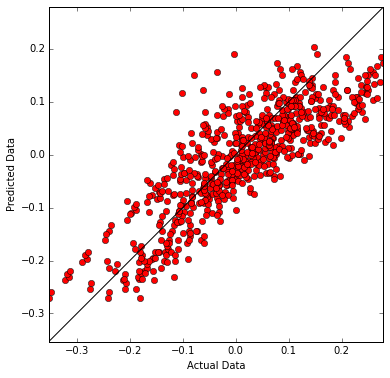

In [34]:
plt.subplots(figsize=(6, 6))
plt.plot(PC_test[:,0],PCpredict,'ro')
plt.plot([min(min(PC_test[:,0]),min(PCpredict)),max(max(PC_test[:,0]),max(PCpredict))],[min(min(PC_test[:,0]),min(PCpredict)),max(max(PC_test[:,0]),max(PCpredict))],'black')

plt.xlim(min(min(PC_test[:,0]),min(PCpredict)), max(max(PC_test[:,0]),max(PCpredict)))
plt.ylim(min(min(PC_test[:,0]),min(PCpredict)), max(max(PC_test[:,0]),max(PCpredict)))

plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')


In [35]:
print("Mean squared error:" ,np.mean((PCpredict - PC_test[:,0]) ** 2))

('Mean squared error:', 0.0048267775502841368)


In [36]:
# print R^2 value

regr.score(paramTrain[:,1:7], PCA_train[:,0])

0.75863536123703601

In [37]:
np.mean(PC_test[:,0])

0.011498048785189164

In [38]:
# polynomial model 

from sklearn.preprocessing import PolynomialFeatures

polynomial = PolynomialFeatures(degree=2) # 3rd degree polynomial
trainParam = polynomial.fit_transform(paramTrain[:,1:7])
testParam = polynomial.fit_transform(paramTest[:,1:7])

trainParam.shape

(915, 28)

In [39]:
poly_model_3deg_PC1 = regr.fit(trainParam, PCA_train[:,0])



In [40]:
PC_poly_model_predict_PC1 = poly_model_3deg_PC1.predict(testParam)


In [41]:
# build a model for PC2

poly_model_3deg_PC2 = regr.fit(trainParam, PCA_train[:,1])
PC_poly_model_predict_PC2 = poly_model_3deg_PC2.predict(testParam)


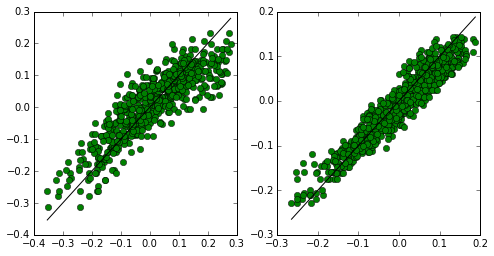

In [42]:
fig, ax = plt.subplots(figsize=(8, 4))

plt.subplot(121)
plt.plot(PC_test[:,0],PC_poly_model_predict_PC1,'go')
plt.plot([min(min(PC_test[:,0]),min(PC_poly_model_predict_PC1)),max(max(PC_test[:,0]),max(PC_poly_model_predict_PC1))],[min(min(PC_test[:,0]),min(PC_poly_model_predict_PC1)),max(max(PC_test[:,0]),max(PC_poly_model_predict_PC1))],'black')

#plt.xlim(min(min(PC_test[:,0]),min(PC_poly_model_predict_PC1)), max(max(PC_test[:,0]),max(PC_poly_model_predict_PC1)))
#plt.ylim(min(min(PC_test[:,0]),min(PC_poly_model_predict_PC1)), max(max(PC_test[:,0]),max(PC_poly_model_predict_PC1)))

plt.subplot(122)
plt.plot(PC_test[:,1],PC_poly_model_predict_PC2,'go')
plt.plot([min(min(PC_test[:,1]),min(PC_poly_model_predict_PC2)),max(max(PC_test[:,1]),max(PC_poly_model_predict_PC2))],[min(min(PC_test[:,1]),min(PC_poly_model_predict_PC2)),max(max(PC_test[:,1]),max(PC_poly_model_predict_PC2))],'black')

#plt.xlim(min(min(PC_test[:,1]),min(PC_poly_model_predict_PC2)), max(max(PC_test[:,1]),max(PC_poly_model_predict_PC2)))
#plt.ylim(min(min(PC_test[:,1]),min(PC_poly_model_predict_PC2)), max(max(PC_test[:,1]),max(PC_poly_model_predict_PC2)))


In [43]:
print("Mean squared error:" ,np.mean((PC_poly_model_predict_PC1 - PC_test[:,0]) ** 2))

('Mean squared error:', 0.0037232627785542451)


In [44]:
print("Mean squared error:" ,np.mean((PC_poly_model_predict_PC2 - PC_test[:,1]) ** 2))

('Mean squared error:', 0.0010844815713058514)


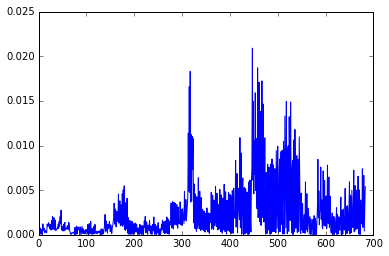

In [45]:
#err = np.concatenate(((PC_poly_model_predict_PC1 - PC_test[:,0]) ** 2, (PC_poly_model_predict_PC2 - PC_test[:,1]) ** 2), axis =1)
errPC1 = (PC_poly_model_predict_PC1 - PC_test[:,0]) ** 2
errPC2 = (PC_poly_model_predict_PC2 - PC_test[:,1]) ** 2

err = np.array([errPC1, errPC2])
err.shape

mean_err = np.mean(err, axis = 0)
mean_err.shape

plt.plot(mean_err)

<matplotlib.colorbar.Colorbar instance at 0x112d5b050>

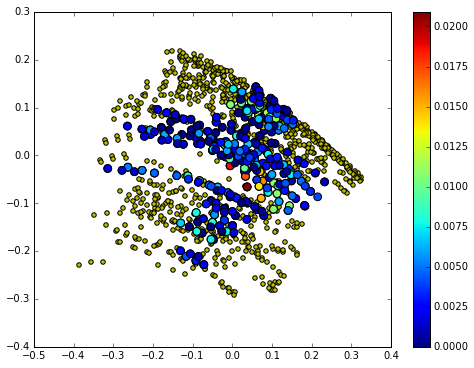

In [46]:
plt.subplots(figsize = (8,6))

plt.scatter(PCA_train[:,0],PCA_train[:,1], c = 'y')
plt.scatter(PC_poly_model_predict_PC1, PC_poly_model_predict_PC2, s = 60, c = mean_err)
plt.colorbar()

In [47]:
# R^2 value

regr.score(trainParam, PCA_train[:,1])

0.92456232377191894